## Table of Contents

01. Importing the Data and Libraries

02. Security Implications: To address any PII data in the data before continuing your analysis.

03. Creating a regional segmentation of the data - “Region” column based on the “State” column from the customer's data set.

04. Creating an exclusion flag for low-activity customers (customers with less than 5 orders) and excluding them from the data.

05. Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### 1. Importing the Data and Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
# define path
path =r"C:\Users\repla\Documents"

In [4]:
# Import Data
df = pd.read_pickle(r"C:\Users\repla\Documents\02 Data\Prepared Data\orders_products_merged4.9.part1.pkl")

In [5]:
df.shape

(1000000, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   product_id              1000000 non-null  int64         
 1   product_name            1000000 non-null  object        
 2   aisle_id                1000000 non-null  int64         
 3   department_id           1000000 non-null  int64         
 4   prices                  1000000 non-null  float32       
 5   order_id                1000000 non-null  int64         
 6   user_id                 1000000 non-null  object        
 7   order_number            1000000 non-null  int64         
 8   orders_day_of_week      1000000 non-null  int64         
 9   time_of_order           1000000 non-null  int64         
 10  days_since_prior_order  933795 non-null   float64       
 11  add_to_cart_order       1000000 non-null  int64         
 12  reordered      

<Axes: xlabel='orders_day_of_week'>

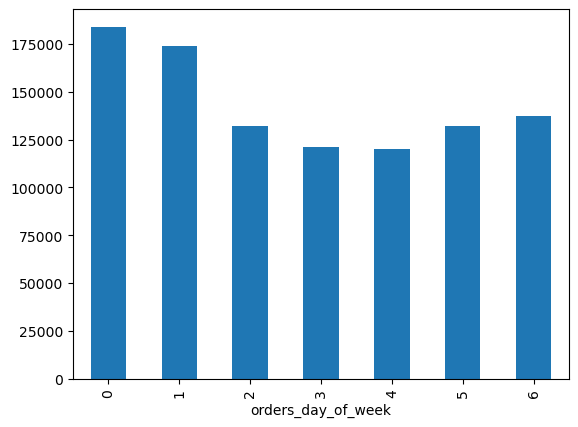

In [9]:
#2
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

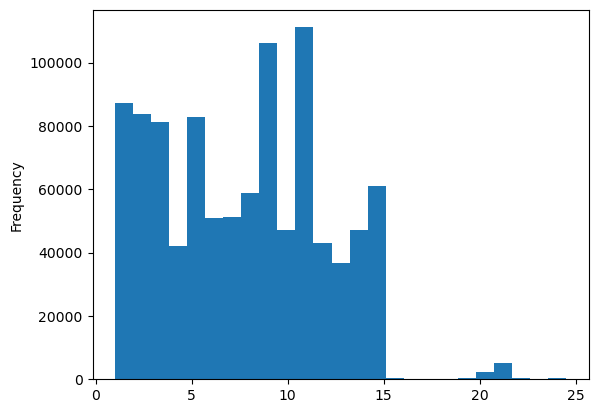

In [8]:
df['prices'].plot.hist(bins = 25)

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

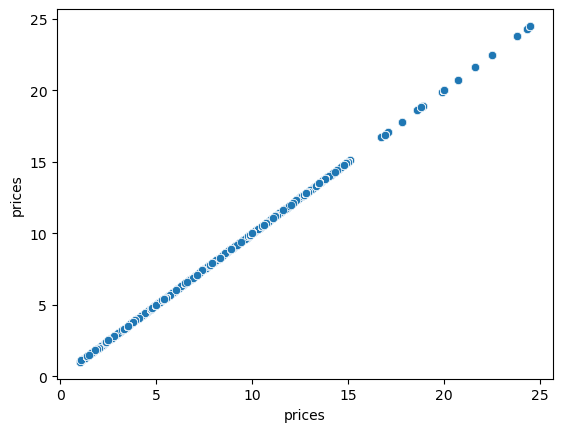

In [10]:
# creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

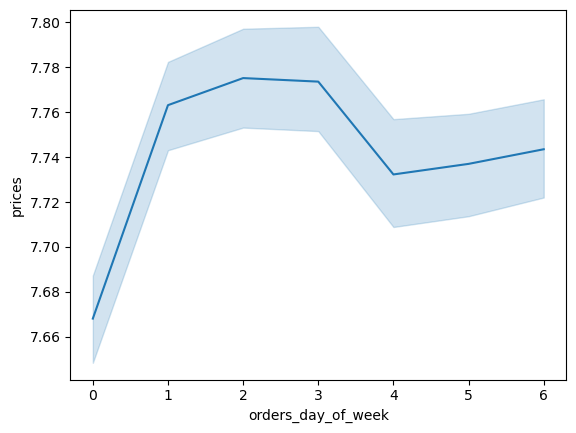

In [11]:
#create line chart
line = sns.lineplot(data = df, x = 'orders_day_of_week',y = 'prices')

# 3

<Axes: ylabel='Frequency'>

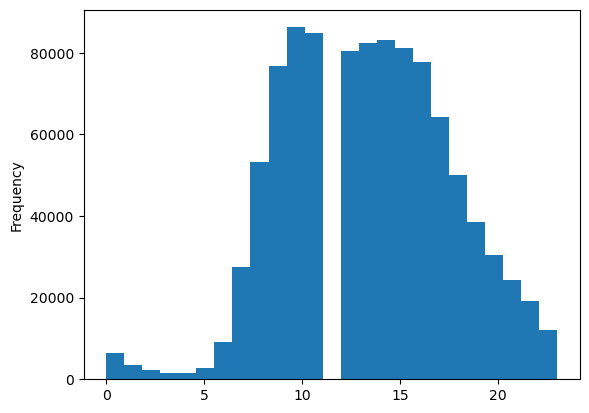

In [13]:
df['time_of_order'].plot.hist(bins = 25)

In [14]:
# it is clear that sales increase in the morning, peak just before the noon hour, stay strong for the afternoon, and slowly decline as the day reaches it's end.

# 4

<Axes: xlabel='loyalty_flag'>

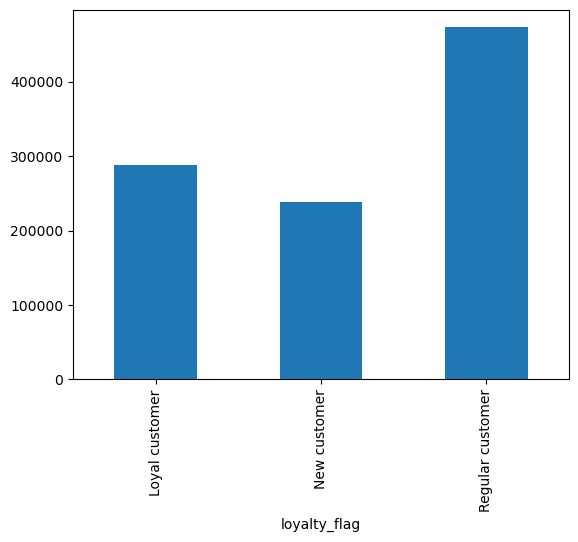

In [15]:
df['loyalty_flag'].value_counts().sort_index().plot.bar()

# 5

In [16]:
#create the random seed so its replicable
np.random.seed(4)

In [17]:
#create a list of (True, False) values based on random assignment of values between 0-1 and is less than 0.7
dev = np.random.rand(len(df)) <= 0.7

In [18]:
# Stores 70% of data sample in big dataframe (<= 0.7)
big = df[dev]

In [19]:
# Stores 30% of data sample in small dataframe (> 0.7)
small = df[~dev]

In [20]:
# Checking the length of the dataframes
big_len = len(big)
small_len = len(small)

In [21]:
big_len + small_len

1000000

In [22]:
len(df)

1000000

In [23]:
df_2 = small[['time_of_order', 'prices']]

In [24]:
df_2.head()

,time_of_order,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,21,9.0
10,21,3.9


C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

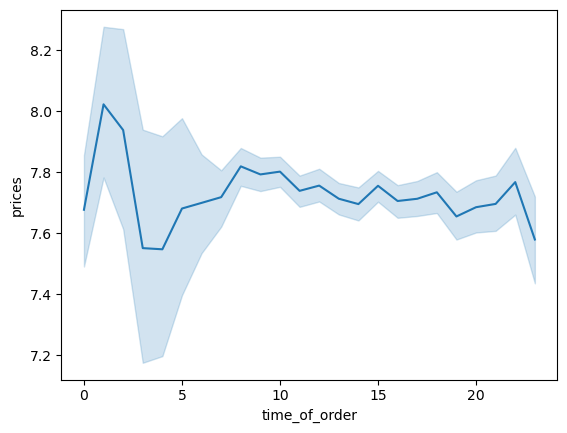

In [25]:
line = sns.lineplot(x='time_of_order', y='prices', data=df_2)

In [26]:
line.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_orders_days_vs_prices.png'))

# 6

In [27]:
# Extract age and depenandants into a dataframe
df_age = df[['age','n_dependants']]

In [28]:
df_age.head()

,age,n_dependants
0,81,1
1,81,1
2,81,1
3,81,1
4,81,1


C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

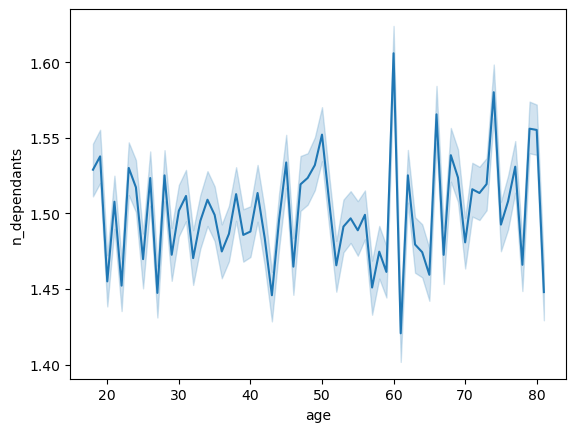

In [29]:
line_age = sns.lineplot(data=df_age, x='age', y='n_dependants')

In [30]:
line_age.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_age_ndependants.png'))

In [31]:
# There is some variance throughout the age options, but it is extremely small. 

# 7

In [32]:
# Extract age and income into a separate dataframe
df_income = df[['age', 'income']]

In [33]:
df_income.head()

,age,income
0,81,49620
1,81,49620
2,81,49620
3,81,49620
4,81,49620


C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


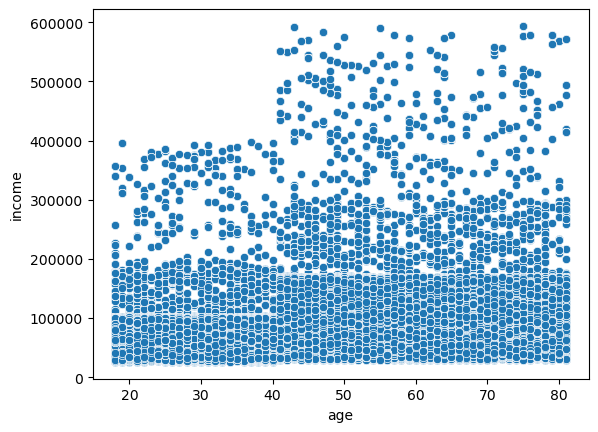

In [34]:
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_income)

In [35]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/scatter_age_income.png'))

In [36]:
# Spending power increases dramatically ages 40 and up
#the 200000 - 300000 section is much more dense with people 40 - 80+